# Сборный Проект

**Выявление закономерностей, определяющих успех игры**  

В этом проекте я выступаю в роли аналитика интернет-магазина, который продает компьютерные игры по всему миру. Мне предоставили данные о продажах игр с 1980 по 2016 год. Данные имеют следующие характеристики:  
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (от 0 до 100)
* User_Score — оценка пользователей (от 0 до 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Для того, чтобы выбрать стратегию работы и направление продаж в следующем году, мне поручили проанализировать данные и выявить закономерности и поведенческие паттерны пользователей. Это в дальнейшем поможет нам прогнозировать спрос и потребности, что, в свою очередь, увеличит доходы магазина.

## Открытие файла и изучение информации

### Изучение данных, предоставленных для проекта

Импортируем необходимые библиотеки:

In [1]:
# <подключим необходимые библиотеки для проведения анализа>
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Line
init_notebook_mode(connected=True)
from matplotlib import rcParams
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
# <чтение файла с данными с сохранением в games>
games = pd.read_csv('games.csv')

In [3]:
# <получение первых 10 строк таблицы games>
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Получим перечень названий столбцов

In [4]:
# <перечень названий столбцов таблицы games>
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Названия столбцов содержат буквы разных регистров.

### Получение общей информации о данных таблицы

In [5]:
# <получение общей информации о данных в таблице games>
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Количество строк: 16715.  
Всего в таблице 11 столбцов:
* 6 столбцов с типом float64
* 5 столбцов с типом object

Можно отметить ряд несоответсвий:
* у поля *Year_of_Release* тип float64
* у поля *User_Score* тип object

Количество значений в столбцах различается. Это говорит о том, что в данных есть пустые значения.

### Проверка данных на наличие пропусков

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений:

In [6]:
# <посчитаем суммарное количество пропусков методом isnull()>
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Можно отметить:
* несущественное количество пропусков в столбцах *Name* и *Genre* 
* небольшое количество пропусков в столбце *Year_of_Release*
* значительное количество пропусков в столбцах *Critic_Score*, *User_Score* и *Rating* 

### Установление наличия дубликатов

In [7]:
# <проверка: вычисление суммарного количества пропусков, выявленных в таблице games>
games.duplicated().sum()

0

### Изучение столбцов с текстом на предмет появления нестандартных значений

Просмотрим все уникальные значения в столбцах *Platform*, *Genre* и *Rating* на предмет появления нестандартных

In [8]:
# <просмотр списка уникальных значений в столбце 'Platform'>
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Платформа "*2600*" вызывает подозрение.

In [9]:
# <просмотр списка уникальных значений в столбце 'Genre'>
games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Есть значение *nan* - это мы как раз и видели в п. 1.3.

In [10]:
# <просмотр списка уникальных значений в столбце 'Rating'>
games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Есть значение *nan* - это мы как раз и видели в п. 1.3.

In [11]:
# <просмотр списка уникальных значений в столбце 'User_Score'>
games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Есть значение nan - это мы как раз и видели в п. 1.3. Значение "*tbd*" вызывает подозрение.

### Выводы

1.	Названия столбцов содержат буквы разных регистров.
2.	У столбцов *Year_of_Release* и *User_Score* содержимое не соответсвует типу данных.
3.	Таблица содержит большое количество пропусков. 
4.  В столбце *Platform* есть подозрительное значение "*2600*", которое надо проверить.
5. В столбце *User_Score* есть подозрительное значение "*tbd*", которое надо проверить.

## Подготовка данных

Запрос "2600 game platform" в поисковой системе снимает сомнения про валидность значения - это платформа **Atari 2600**.

### Замена названий столбцов

Переименуем столбцы для удобства дальнейшей работы.

In [12]:
# <переименуем столбцы для удобства дальнейшей работы (приведем к нижнему регистру)>
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование данных в нужные типы 

В исходной таблице столбец *year_of_release* имеет формат *float64*. Как известно, для идентифицирования года нужно целое число. Поэтому надо заменить тип данных столбца с *float64* на *Int64*:

In [13]:
# <изменим тип данных в столбце year_of_release>
games['year_of_release'] = games['year_of_release'].astype('Int64')
print(games.year_of_release.dtypes)

Int64


В исходной таблице столбец *user_score* имеет формат *object*.  
Из описания нам известно, что диапазон значений столбца *user_score* - от *0* до *10*. 
Обратим внимание на появление значения *tbd*, что расшифровывается как *to be determined*. То есть по факту это значение можно приравнять к отсутсвию значения (*NaN*).
Также мы увидели, что все значения представляют собой числа с плавающей запятой. Справедливым будет перевести значения данного столбца к *float64*:

In [14]:
# <заменим значение tbd* в столбце user_score на *NaN*>
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True)

In [15]:
# <изменим тип данных в столбце user_score>
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
print(games.user_score.dtypes)

float64


Из описания нам известно, что диапазон значений столбца *critic_score* - от *0* до *100*.
В исходной таблице столбец *critic_score* имеет формат *float64*.
Посмотрим список уникальных значений:

In [16]:
# <просмотр списка уникальных значений в столбце 'critic_score'>
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Отметим, что все значения представляют собой целые числа. Справедливым будет перевести значения данного столбца к *Int64*:

In [17]:
# <изменим тип данных в столбце critic_score>
games['critic_score'] = games['critic_score'].astype('Int64')
print(games.year_of_release.dtypes)

Int64


Получим общую обновленную информацию по таблице:

In [18]:
# <получение обновленной общей информации о данных в таблице games>
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

Просмотрим строки с пропущенным полем *name*:

In [19]:
# <выведем строки с пропусками в столбце *name* методом isnull()>
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Пропуски в этом столбце носят полностью случайный арактер (MCAR).
Кроме этого видим, что это те же строки, в которых нет и значения в столбце *genre*. В этих же строках нет данных в столбцах *critic_score*, *user_score* и *rating*.
И если учесть, что таких строк 2 из 16715, то игнорирование/исключение записей, содержащих пропущенные данные, не ведет к искажению результатов.  
Причиной появления пропусков в этих столбцах могла быть критическая ошибка в процессе выгрузки данных.

In [20]:
# <удаление пропущенных значений в столбце 'name'>
games.dropna(subset = ['name'], inplace = True)
games['name'].isnull().sum()

0

Выведем строки с пропущенным полем *year_of_release*:

In [21]:
# <посмотрим строки с пропусками в столбце *year_of_release* методом isnull()>
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Пропуски в этом столбце носят неслучайный арактер (MNAR). В этом столбце 269 пропусков, это составляет 1.6% процента от всех значений датафрейма. Уделение стольких строк может повлиять на результат.  
Причиной появления пропусков в этом столбце могла быть критическая ошибка в процессе выгрузки данных.

Так как игры часто выходят сразу на нескольких платформах - проверим на скольких платформах выходила каждая из игр.

In [22]:
# <посмотрим сколько раз встречается каждое из значений в столбце 'name'>
games['name'].value_counts()

Need for Speed: Most Wanted           12
Ratatouille                            9
LEGO Marvel Super Heroes               9
Madden NFL 07                          9
FIFA 14                                9
                                      ..
Chromehounds                           1
NBA ShootOut 98                        1
Go Play: Circus Star                   1
SingStar Party                         1
Yu-Gi-Oh! The Eternal Duelist Soul     1
Name: name, Length: 11559, dtype: int64

Исхдодя из результатов можно провести проверку на совпадение значений столбца *name* строк без пропусков со строками с пропусками в столбце *year_of_release* и провести подстановку совпавших значений:

In [23]:
# <циклом проверим все пропуски в столбце *year_of_release* на предмет совпадения названий игр из другх строк,>
# <у которых год не пропущен и сделаем подстановку>
for i in games[games['year_of_release'].isnull() == True].index:
    games['year_of_release'][i] = games.loc[games['name'] == games['name'][i], 'year_of_release'].max()

Проверим, сколько пропусков осталось после подстановки:

In [24]:
# <посчитаем суммарное количество пропусков в столбце *year_of_release*>
games['year_of_release'].isna().sum()

146

Выведем строки с пропущенным полем *critic_score*:

In [25]:
# <посмотрим строки с пропусками в столбце *critic_score* методом isnull()>
games[games['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Пропуски в этом столбце носят неслучайный арактер (MNAR). В этом столбце 8576 пропусков, это составляет 51.3% процента от всех значений датафрейма. Уделение или замена (медианой, средним или другим методом) стольких строк значительно повлияет на результат.  
Причиной появления пропусков в этом столбце могло быть:
* критическая ошибка в процессе выгрузки данных,
* в случае с более новыми играми, это отсутсвие оценок, ввиду того, что не успели опубликовать их.

Выведем строки с пропущенным полем *user_score*:

In [26]:
# <посмотрим строки с пропусками в столбце *user_score* методом isnull()>
games[games['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Пропуски в этом столбце носят неслучайный арактер (MNAR). В этом столбце 9123 пропусков, это составляет 54.6% процента от всех значений датафрейма. Уделение или замена (медианой, средним или другим методом) стольких строк значительно повлияет на результат.  
Причиной появления пропусков в этом столбце могло быть:
* критическая ошибка в процессе выгрузки данных,
* в случае с более новыми играми, это отсутсвие оценок, ввиду того, что не успели опубликовать их.

Выведем строки с пропущенным полем *rating*:

In [27]:
# <посмотрим строки с пропусками в столбце *rating* методом isnull()>
games[games['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Пропуски в этом столбце носят неслучайный арактер (MNAR). В этом столбце 6764 пропусков, это составляет 40.5% процента от всех значений датафрейма. Уделение или замена (медианой, средним или другим методом) стольких строк значительно повлияет на результат.  
Причиной появления пропусков в этом столбце могла быть критическая ошибка в процессе выгрузки данных.

### Суммарные продажи

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [28]:
# <создадим новый столбец sum_sales, где суммируем продажи во всех регионах>
games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [29]:
# <получение первых 10 строк обновленной таблицы games>
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN,28.31


### Выводы

1.  Было изучено подозрительное значение в столбце *platform*.
2.	Были переименованы столбцы для удобства дальнейшей работы.
3.	Были изменены типы данных в столбцах *year_of_release*, *user_score* и *critic_score*.
4.	Были обработаны пропуски в столбцах *name*, *genre* и *year_of_release*. 
5.  Были посчитаны суммарные продажи во всех регионах.

## Исследовательский анализ данных

### Анализ количества игр выпущенных в разные годы

Посмотрим, сколько игр выпускалось в разные годы:

In [30]:
# <создадим таблицу отображающую количество игр, выходящих каждый год и построим график с помощью пакета plotly>
games_appearance = games.groupby('year_of_release')[['name']].count()

games_appearance.columns = ['name']

trace = go.Line(
    x=games_appearance.index,
    y=games_appearance.name,
    name='name'
)
data = [trace]
layout = {'title': 'Количество выходящих игр', 'yaxis': {'title': 'Количество игр'},'xaxis': {'title': 'Год выпуска'}}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

До 1993 года выходило примерно одинаковое количество игр. Начиная с 1993 началось плавное увеличение числа игр, а с 2001 начался стремительный рост. Максимальное количество игр выходило в 2008 и 2009 годах. После пика в 2009, начался стремительный спад числа выходящих игр.  
Можно отметить, что с 2000 года число вышедших игр не падало ниже 400. С большой долей вероятности можно предположить, что данные за весь период будут не так важны, нежели за какой-то временной промежуток.

### Анализ динамики изменения продаж по платформам

Выберем платформы с наибольшими суммарными продажами:

In [31]:
# <создадим таблицу отображающую суммарныые продажи по платформам, и построим гистограмму с помощью пакета plotly>
platforms_sum_sales = games.groupby('platform')[['sum_sales']].sum()

platforms_sum_sales.columns = ['sum_sales']
platforms_sum_sales.sort_values('sum_sales', ascending=False, inplace=True)

trace = go.Bar(
    x=platforms_sum_sales.index,
    y=platforms_sum_sales.sum_sales,
    name='sum_sales'
)
data = [trace]
layout = {'title': 'Суммарные продажи платформ', 'yaxis': {'title': 'млн. $'},'xaxis': {'title': 'Платформа'}}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Из этого перечня платформ можно выделить ряд с наибольшими суммарными продажами:
1. PS2
2. X360
3. PS3
4. Wii
5. DS
6. PS

Ранее мы отмечали, что с 2001 года (включительно) начался стремительные рост, поэтому именно этоим годом будет открываться период актуальных для нас данных. 

Составим функцию, которая будет возвращать данные, за актуальный период:

In [32]:
# <составим функцию, возвращающую сводную таблицу за период после 2000 года>
def year_sum_sale_for_platform(name, data):
    return data[(data['platform']==name) & (data['year_of_release']>2000)].pivot_table(
        index='year_of_release', values='sum_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)

В следующем шаге исследования речь идет о самых популярных платформах (топ-5). Поэтому остановимся на первых пяти:

In [33]:
# <составим и отобразим таблицу: топ-5 платформ с их суммарными продажами>
top5_platform = (games.pivot_table(
    index='platform', values='sum_sales', aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False).head(5)
)
top5_platform = top5_platform.reset_index()
top5_platform

,platform,sum_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


Построим распределение продаж этих платформ по годам:

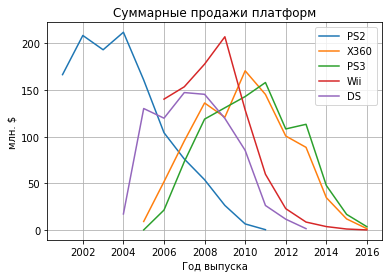

In [34]:
# <построим график распределения продаж топ-5 платформ за актуальный период с помощью библиотеки seaborn>
for i in list(top5_platform['platform']):
    sns.lineplot(data=year_sum_sale_for_platform(i,games)['sum_sales'], label=i)
    rcParams['figure.figsize'] = 12,8
    plt.legend(fontsize=10)
plt.title('Суммарные продажи платформ')
plt.xlabel('Год выпуска')
plt.ylabel('млн. $')
plt.grid()

Наайдем популярные платформы в прошлом:

In [35]:
# <составим функцию, возвращающую сводную таблицу за период до 2001 года>
def year_sum_sale_for_platform_past(name, data):
    return data[(data['platform']==name) & (data['year_of_release']<2001)].pivot_table(
        index='year_of_release', values='sum_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)

In [36]:
# <составим и отобразим рейтинг популярных в порошлом платформ с их суммарными продажами>
top_platform_past = (games[games['year_of_release']<2001]
    .pivot_table(index='platform', values='sum_sales', aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False).head(10)
)
top_platform_past = top_platform_past.reset_index()
top_platform_past

,platform,sum_sales
0,PS,683.25
1,NES,251.05
2,GB,245.19
3,N64,214.82
4,SNES,200.04
5,2600,86.48
6,PC,54.70
7,PS2,39.17
8,SAT,33.59
9,GEN,28.35


Построим распределение продаж этих платформ по годам:

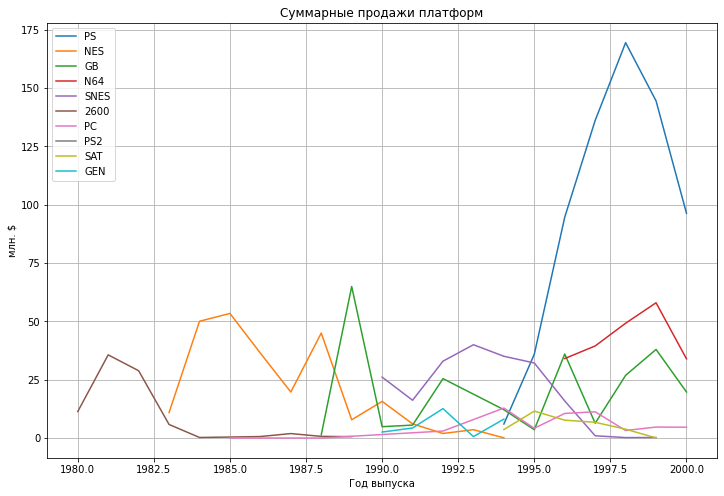

In [37]:
# <построим график распределения продаж популярных в прошлом платформ с помощью библиотеки seaborn>
for i in list(top_platform_past['platform']):
    sns.lineplot(data=year_sum_sale_for_platform_past(i,games)['sum_sales'], label=i)
    rcParams['figure.figsize'] = 12,8
    plt.legend(fontsize=10)
plt.title('Суммарные продажи платформ')
plt.xlabel('Год выпуска')
plt.ylabel('млн. $')
plt.grid()

Исходя из графиков распределений, можно отметить, что характерный период за который появляются новые и исчезают старые платформы составляет примерно 10 лет. Также можно отметить, что пик суммарных продаж платформ приходится на середину периода существования - 5 лет. Второе более характерно для новых платформ. Суммарные продажи старых платформ изменяются скачкообразно и не значительно, обусловлено это тем, что в это время (до 2001) развите игровых платформ носило вялотекущий характер, что вело к длительному использованию имеющихся игровых платформ, а скачки обусловлены выходом новой популярной игры.

### Определилим, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году.

Для того, чтобы определить нужный нам период, посмотрим о каком искажении идёт речь.

In [38]:
# <создадим таблицу отображающую суммарныые продажи по платформам за 2016 год, и построим гистограмму с помощью пакета plotly>
platforms_2016_sum_sales = games[games['year_of_release']==2016].groupby('platform')[['sum_sales']].sum()

platforms_2016_sum_sales.columns = ['sum_sales']
platforms_2016_sum_sales.sort_values('sum_sales', ascending=False, inplace=True)

trace = go.Bar(
    x=platforms_2016_sum_sales.index,
    y=platforms_2016_sum_sales.sum_sales,
    name='sum_sales'
)
data = [trace]
layout = {'title': 'Продажи платформ в 2016 году', 'yaxis': {'title': 'млн. $'},'xaxis': {'title': 'Платформа'}}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Явно выделяется платформа *PS4*. При этом она занимает достаточно невысокое место в рейтинге по сумме продаж за актуальный период. Это обусловлено тем, что данная платформа вышла в 2013 году. На конец актуального периода *PS4* как раз выходит к максимальным для себя продажам.  

Исходя из того что:
* характерный период существования современных платформ составляет примерно 10 лет, а пик продаж приходится на середину этого отрезка;
* платформа *PS4* вышла в 2013 году,  

чтобы исключить значимое искажение распределения **выберем и дальше будем работать с интервалом 2012-2016 (5 лет)**.

### Определим платформы лидирующие по продажам

Для определения платформ, лидирующих по суммарным продажам, выберем данные с 2012 года.

Составим функцию, которая будет возвращать данные, за актуальный период:

In [39]:
# <составим функцию, возвращающую сводную таблицу за период после 2011 года>
def year_sum_sale_for_platform_fresh_data(name, data):
    return data[(data['platform']==name) & (data['year_of_release']>2011)].pivot_table(
        index='year_of_release', values='sum_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)

In [40]:
# <составим таблицу: топ-5 платформ с их сумарными продажами>
top_platform_fresh_data = (games[games['year_of_release']>2011].pivot_table(
    index='platform', values='sum_sales', aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False).head(5)
)
top_platform_fresh_data = top_platform_fresh_data.reset_index()

По суммарным продажам за данный период лидируют следующие платформы:

In [41]:
# <отобразим таблицу: топ-5 платформ с их суммарными продажами>
top_platform_fresh_data

,platform,sum_sales
0,PS4,314.14
1,PS3,289.71
2,X360,237.52
3,3DS,195.01
4,XOne,159.32


Построим распределение продаж этих платформ по годам:

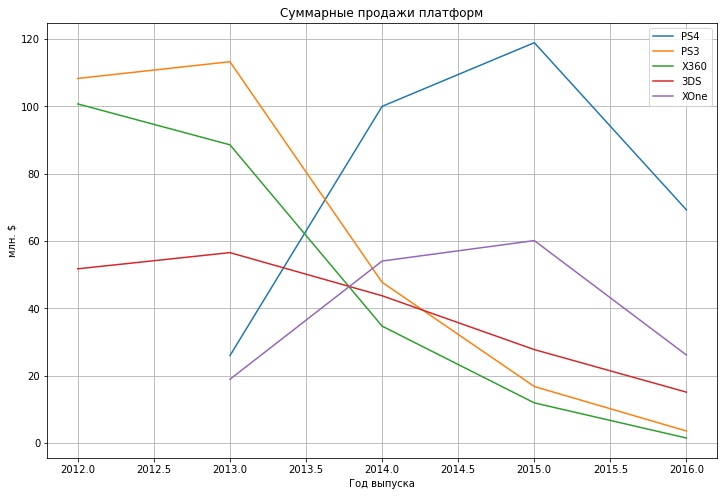

In [42]:
# <построим график распределения продаж топ-5 платформ за актуальный период с помощью библиотеки seaborn>
for i in list(top_platform_fresh_data['platform']):
    sns.lineplot(data=year_sum_sale_for_platform_fresh_data(i,games)['sum_sales'], label=i)
    plt.legend(fontsize=10)
plt.title('Суммарные продажи платформ')
plt.xlabel('Год выпуска')
plt.ylabel('млн. $')
plt.grid()

Можно отметить данный временной отрезок (2012-2016) переходным: наблюдаем падение суммарных продаж платформ *PS3*, *X360* и *3DS*, но в это же время растут продажи платформ *PS4* и *XOne*. Эти же платформы можно выбрать как потенциально прибыльные т.к., согласно статистике, в ближайшее время у игр на них будут максимально высокие суммарные продажи.

### Оценим глобальные продажи каждой игры с разбивкой по платформам

Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам:

In [43]:
# <создадим датафрейм отражающий суммарныые продажи каждой игры c разбивкой по платформам,>
# <и построим диаграмму размаха с помощью пакета plotly>
top5_platform_fresh_data = games[(games['platform'].isin(['PS4','PS3','X360','3DS','XOne'])) & (games['year_of_release']>2011)]
data = []
for platform in top5_platform_fresh_data.platform.unique():
    data.append(
        go.Box(y=top5_platform_fresh_data[top5_platform_fresh_data.platform==platform].sum_sales, name=platform)
    )
layout = {'title': 'Cуммарныые продажи каждой игры', 'yaxis': {'title': 'млн. $'},'xaxis': {'title': 'Платформа'}}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Межквартильный размах:
* PS3 - 0.56
* X360 - 0.77
* PS4 - 0.67
* 3DS - 0.28
* XOne - 0.6275

Данная величина указывает на то, в каком размахе располагается основная масса значений характеризующих суммарный объём продаж для каждой игры.

Медианные значения:
* PS3 - 0.2
* X360 - 0.31
* PS4 - 0.2
* 3DS - 0.11
* XOne - 0.22

Также видим большое количество выбросов.

Посчитаем среднее значения объёма продаж для каждой игры на лидирующих платформах за актуальный период:

In [44]:
# <создадим датафрейм отражающий среднее значения объёма продаж для каждой игры на лидирующих платформах ,>
# <и построим гистограмму с помощью пакета plotly>
top5_platform_fresh_data = top5_platform_fresh_data.groupby('platform')[['sum_sales']].mean()

top5_platform_fresh_data.columns = ['sum_sales']
top5_platform_fresh_data.sort_values('sum_sales', ascending=False, inplace=True)

trace = go.Bar(
    x=top5_platform_fresh_data.index,
    y=top5_platform_fresh_data.sum_sales,
    name='sum_sales'
)
data = [trace]
layout = {'title': 'Среднее значения объёма продаж для каждой игры', 'yaxis': {'title': 'млн. $'},'xaxis': {'title': 'Платформа'}}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Самые высокие значения у платформ *X360* и *PS4*, то есть игры для этих платформ имеют наибольшие продажи.

### Оценка влияния суммарных продаж платформ к отзывам пользователей и критиков

#### Оценка влияния продаж одной популярной платформы к отзывам пользователей и критиков

При выборе платформы для оценки влияния продаж к отзывам пользователей и критиков будем учитывать следующие критерии:
* носит ли платформа статус актуальной,
* суммарные продажи платформы за актуальный период.  

Лучше всех по этим критериям подходит платформа *PS4*.

Сформируем датафрейм для дальнейшей работы с ним:

In [45]:
# <создадим датафрейм отражающий данные по платформе *PS4*>
top5_platform_fresh_data = games[(games['platform'].isin(['PS4','PS3','X360','3DS','XOne'])) & (games['year_of_release']>2011)]
PS4_fresh_data = top5_platform_fresh_data[top5_platform_fresh_data['platform']=='PS4']

Для того, чтобы подробнее посмотреть на взаимосвязь суммарных продаж платформы к отзывам пользователей, построим диаграмму рассеяния:

Взаимосвязь суммарных продаж платформы к отзывам пользователей


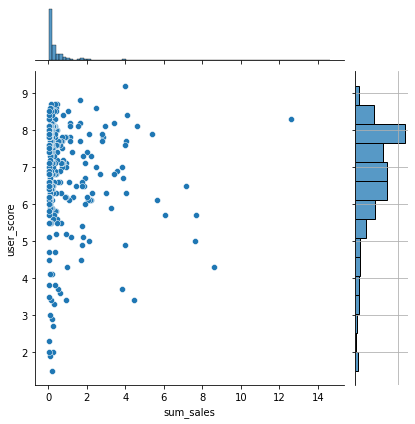

In [46]:
# <построим диаграмму рассеяния для суммарных продаж платформы и отзывов пользователей с помощью библиотеки seaborn>
print('Взаимосвязь суммарных продаж платформы к отзывам пользователей')
sns.jointplot(data=PS4_fresh_data, x="sum_sales", y="user_score")
plt.grid()

Большинство оценок пользователей находится в примерном диапазоне от 6 до 8 баллов, что является достаточно высокой оценкой. Что говорит о высокой популярности игр на этой платформе.

Для того, чтобы подробнее посмотреть на взаимосвязь суммарных продаж платформы к отзывам критиков, построим диаграмму рассеяния:

Взаимосвязь суммарных продаж платформы к отзывам критиков


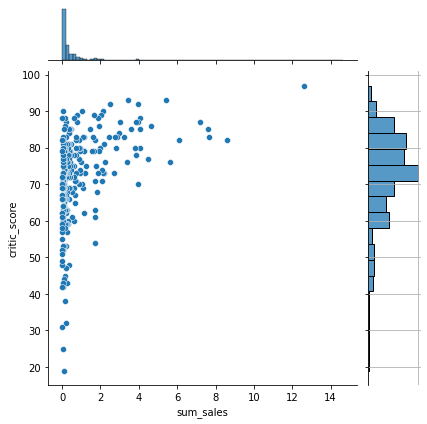

In [47]:
# <построим диаграмму рассеяния для суммарных продаж платформы и отзывов критиков с помощью библиотеки seaborn>
print('Взаимосвязь суммарных продаж платформы к отзывам критиков')
sns.jointplot(data=PS4_fresh_data, x="sum_sales", y="critic_score")
plt.grid()

Большинство оценок критиков находится в примерном диапазоне от 68 до 88 баллов, что является достаточно высокой оценкой. Что говорит о высоком качестве исполнения игр на этой платформе.

Для обеих пар значений найдём коэффициент корреляции:

In [48]:
# <найдем численные значения коэффициента корреляции>
corrs = (PS4_fresh_data[['user_score', 'critic_score']].astype(float)
        .corrwith(PS4_fresh_data.sum_sales)
        )

print(corrs)

user_score     -0.031957
critic_score    0.406568
dtype: float64


Можно сделать выводы:
1. суммарные продажи платформы никак не зависят от отзывов пользователей;
2. есть зависимость суммарных продаж платформы от отзывов критиков, но она не велика (от 0.3 до 0.5 - слабая корреляция), что не дает нам говорить о прямой зависимости этих параметров;
3. совокупность лояльности пользователей и критиков дает играм выходящим на платформе *PS4* наибольшие суммарные продажи за актуальный период.

#### Оценка влияния продаж на остальных платформах

Соотнесем, полученные в предущем пункте выводы, с продажами на других платформах (остальные актуальные за исключением *PS4*).

Сформируем датафрейм для дальнейшей работы с ним:

In [49]:
# <создадим датафрейм отражающий данные по остальным платформам>
other_platforms_fresh_data = top5_platform_fresh_data[top5_platform_fresh_data['platform'].isin(['PS3','X360','3DS','XOne'])]

Для просмотра взаимосвязи суммарных продаж платформ к отзывам пользователей, построим диаграмму рассеяния:

Взаимосвязь суммарных продаж платформ к отзывам пользователей


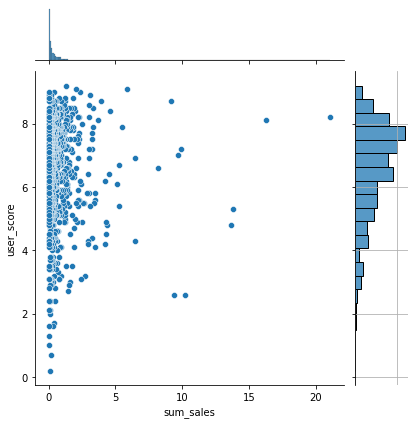

In [50]:
# <построим диаграмму рассеяния для суммарных продаж платформ и отзывов пользователей с помощью библиотеки seaborn>
print('Взаимосвязь суммарных продаж платформ к отзывам пользователей')
sns.jointplot(data=other_platforms_fresh_data, x="sum_sales", y="user_score")
plt.grid()

На диаграмме можно наблюдать, что большинство оценок пользователей находится в том же диапазоне - от 6 до 8.

Для просмотра взаимосвязи суммарных продаж платформ к отзывам критиков, построим диаграмму рассеяния:

Взаимосвязь суммарных продаж платформы к отзывам критиков


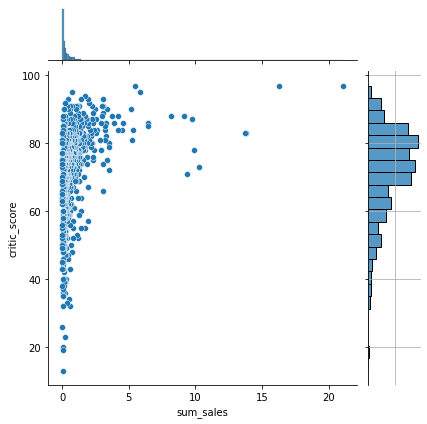

In [51]:
# <построим диаграмму рассеяния для суммарных продаж платформ и отзывов критиков с помощью библиотеки seaborn>
print('Взаимосвязь суммарных продаж платформы к отзывам критиков')
sns.jointplot(data=other_platforms_fresh_data, x="sum_sales", y="critic_score")
plt.grid()

На диаграмме можно наблюдать, что большинство оценок критиков находится в том же диапазоне - от 68 до 88 баллов.

Найдём численные коэффициенты корреляции:

In [52]:
# <найдем численные значения коэффициента корреляции>
corrs = (other_platforms_fresh_data[['user_score', 'critic_score']].astype(float)
        .corrwith(other_platforms_fresh_data.sum_sales)
        )

print(corrs)

user_score      0.008841
critic_score    0.339632
dtype: float64


Можно сделать выводы:
1. есть зависимость суммарных продаж платформы от отзывов пользователей, но она не мала (до 0.3 - очень слабая корреляция), что не дает нам говорить о прямой зависимости этих параметров;
2. есть зависимость суммарных продаж платформы от отзывов критиков, но она не велика (от 0.3 до 0.5 - слабая корреляция), что не дает нам говорить о прямой зависимости этих параметров;
3. соотнеся выводы, полученные в предыдущем пункте, с данными в этом, можно говорить об идентичном влиянии и распрелеоении отзывов пользователей на все платформы.

### Анализ общего распределения игр по жанрам

Рассмотрим общее распределение игр по жанрам:

Text(0.5, 1.0, 'Распределение игр по жанрам')

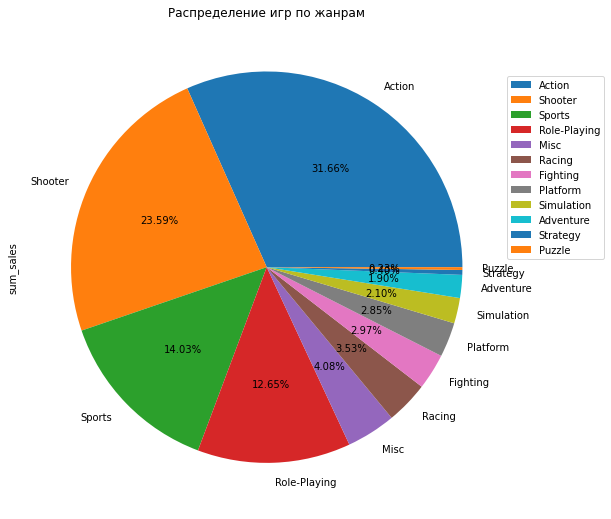

In [53]:
# <составим таблицу распределения игр по жанрам и построим круговую диаграмму с помощью библиотеки matplotlib>
(top5_platform_fresh_data
     .pivot_table(index="genre", values="sum_sales", aggfunc="sum")
     .sort_values('sum_sales', ascending = False)
     .plot(y="sum_sales", kind="pie", figsize=(9, 9), autopct='%1.2f%%')
)
plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9))
plt.title('Распределение игр по жанрам')

Получим суммарные продажи по каждой платформе:

In [54]:
# <отобразим таблицу суммарных продаж по жанрам>
(top5_platform_fresh_data.pivot_table(
    index='genre', values='sum_sales', aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False)
).reset_index()

,genre,sum_sales
0,Action,378.54
1,Shooter,282.12
2,Sports,167.81
3,Role-Playing,151.26
4,Misc,48.78
5,Racing,42.18
6,Fighting,35.53
7,Platform,34.13
8,Simulation,25.16
9,Adventure,22.68


Явно выделяются лидирующие 4 жанра:
1. Action - 32% от общих продаж
2. Shooter - 24% от общих продаж
3. Sports - 14% от общих продаж
4. Role-Playing - 13% от общих продаж

В явных аутсайдерах 2 жанра:
1. Strategy - 0.4% от общих продаж
2. Puzzle - 0.2% от общих продаж

## Портрет пользователя каждого региона 

Составим портрет пользователя каждого региона:

### Портрет пользователя  в Северной Америке

#### Самые популярные платформы в Северной Америке

Для определения самых популярных (топ-5) платформ в Северной Америке построим круговую диаграмму:

Text(0.5, 1.0, 'Самые популярные платформы в Северной Америке')

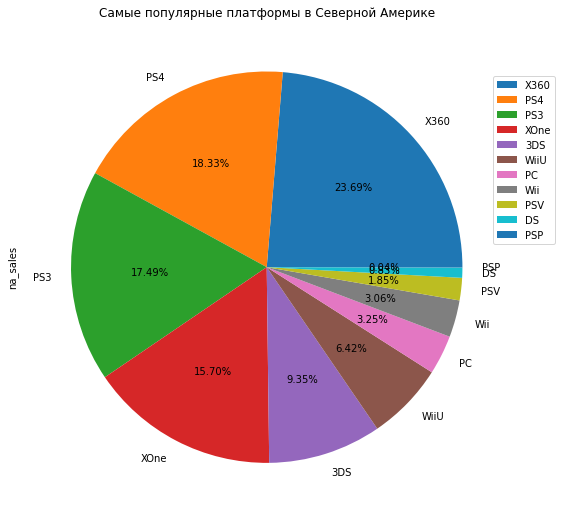

In [55]:
# <составим таблицу распределения суммарных продаж по платформам и построим круговую диаграмму с помощью библиотеки matplotlib>
(games[games['year_of_release']>2011]
     .pivot_table(index="platform", values="na_sales", aggfunc="sum")
     .sort_values('na_sales', ascending = False)
     .plot(y="na_sales", kind="pie", figsize=(9,9), autopct='%1.2f%%')
)
plt.legend(bbox_to_anchor=(0.5, 0, 0.6, 0.9))
plt.title('Самые популярные платформы в Северной Америке')

Выведем топ-5 платформ со значением суммарных продаж:

In [56]:
# <отобразим таблицу суммарных продаж по платформам>
(games[games['year_of_release']>2011]
     .pivot_table(index="platform", values="na_sales", aggfunc="sum")
     .sort_values('na_sales', ascending = False).head(5)
).reset_index()

,platform,na_sales
0,X360,140.57
1,PS4,108.74
2,PS3,103.74
3,XOne,93.12
4,3DS,55.49


Выделяются платформы *Xbox*(One и 360), *PlayStation*(3 и 4) и т *Nintendo*(3DS).

#### Самые популярные жанры в Северной Америке

Для определения самых популярных (топ-5) жанров в Северной Америке построим круговую диаграмму:

Text(0.5, 1.0, 'Самые популярные жанры в Северной Америке')

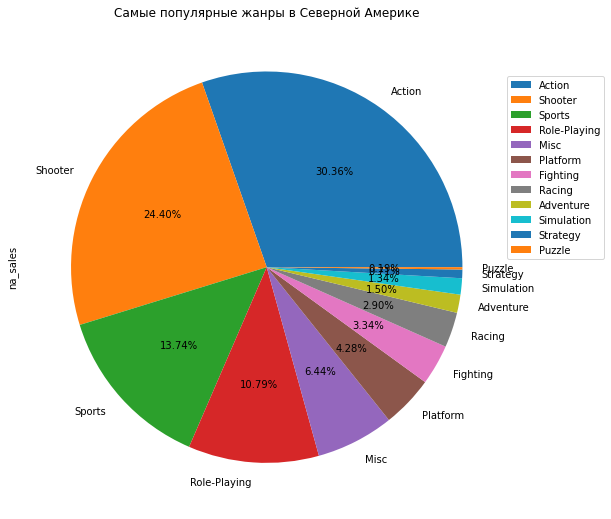

In [57]:
# <составим таблицу распределения суммарных продаж по жанрам и построим круговую диаграмму с помощью библиотеки matplotlib>
(games[games['year_of_release']>2011]
     .pivot_table(index="genre", values="na_sales", aggfunc="sum")
     .sort_values('na_sales', ascending = False)
     .plot(y="na_sales", kind="pie", figsize=(9,9), autopct='%1.2f%%')
)
plt.legend(bbox_to_anchor=(0.5, 0, 0.7, 0.9))
plt.title('Самые популярные жанры в Северной Америке')

Выведем топ-5 жанров со значением суммарных продаж:

In [58]:
# <отобразим таблицу суммарных продаж по жанрам>
(games[games['year_of_release']>2011]
     .pivot_table(index="genre", values="na_sales", aggfunc="sum")
     .sort_values('na_sales', ascending = False).head(5)
).reset_index()

,genre,na_sales
0,Action,180.15
1,Shooter,144.79
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19


Выделяются жанры *Action* и *Shooter*.

#### Анализ влияения рейтинга ESRB на продажи в Северной Америке

Для оценки влияения рейтинга ESRB на продажи в Северной Америке построим круговую диаграмму:

Text(0.5, 1.0, 'Распределение рейтингов игр в Северной Америке')

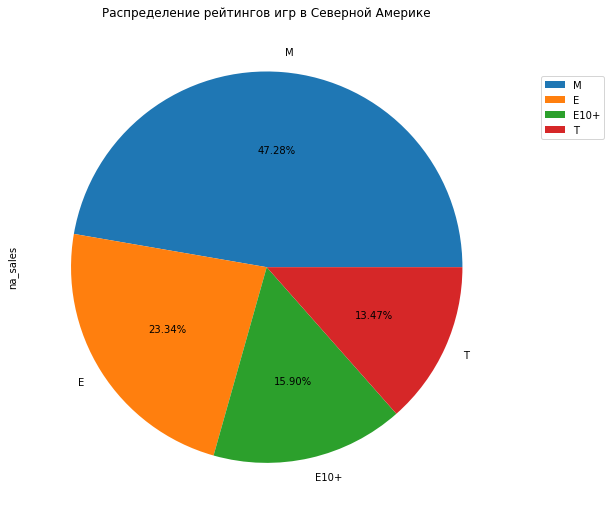

In [59]:
# <составим таблицу распределения рейтинга ESRB и построим круговую диаграмму с помощью библиотеки matplotlib>
(games[games['year_of_release']>2011]
     .pivot_table(index="rating", values="na_sales", aggfunc="sum")
     .sort_values('na_sales', ascending = False)
     .plot(y="na_sales", kind="pie", figsize=(9,9), autopct='%1.2f%%')
)
plt.legend(bbox_to_anchor=(0.5, 0, 0.7, 0.9))
plt.title('Распределение рейтингов игр в Северной Америке')

Суммарные продажи для каждого значения рейтинга:

In [60]:
# <отобразим таблицу суммарных продаж по ретингам>
(games[games['year_of_release']>2011]
     .pivot_table(index="rating", values="na_sales", aggfunc="sum")
     .sort_values('na_sales', ascending = False).head(5)
).reset_index()

,rating,na_sales
0,M,231.67
1,E,114.37
2,E10+,77.93
3,T,66.02


Явно выделяются игры жанра *M*.

### Портрет пользователя  в Европе 

#### Самые популярные платформы в Европе 

Для определения самых популярных (топ-5) платформ в Европе построим круговую диаграмму:

Text(0.5, 1.0, 'Самые популярные платформы в Европе')

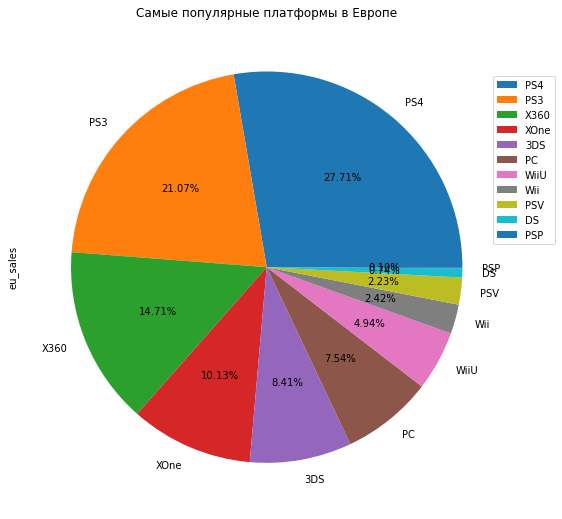

In [61]:
# <составим таблицу распределения суммарных продаж по платформам и построим круговую диаграмму с помощью библиотеки matplotlib>
(games[games['year_of_release']>2011]
     .pivot_table(index="platform", values="eu_sales", aggfunc="sum")
     .sort_values('eu_sales', ascending = False)
     .plot(y="eu_sales", kind="pie", figsize=(9,9), autopct='%1.2f%%')
)
plt.legend(bbox_to_anchor=(0.5, 0, 0.6, 0.9))
plt.title('Самые популярные платформы в Европе')

Выведем топ-5 платформ со значением суммарных продаж:

In [62]:
# <отобразим таблицу суммарных продаж по платформам>
(games[games['year_of_release']>2011]
     .pivot_table(index="platform", values="eu_sales", aggfunc="sum")
     .sort_values('eu_sales', ascending = False).head(5)
).reset_index()

,platform,eu_sales
0,PS4,141.09
1,PS3,107.27
2,X360,74.89
3,XOne,51.59
4,3DS,42.83


Выделяются платформы *PlayStation*(3 и 4), *Xbox*(One и 360) и т *Nintendo*(3DS).

#### Самые популярные жанры в Европе 

Для определения самых популярных (топ-5) жанров в Европе построим круговую диаграмму:

Text(0.5, 1.0, 'Самые популярные жанры в Европе')

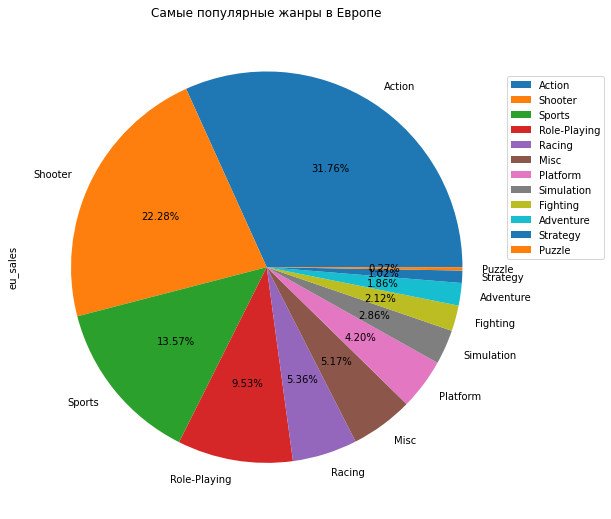

In [63]:
# <составим таблицу распределения суммарных продаж по жанрам и построим круговую диаграмму с помощью библиотеки matplotlib>
(games[games['year_of_release']>2011]
     .pivot_table(index="genre", values="eu_sales", aggfunc="sum")
     .sort_values('eu_sales', ascending = False)
     .plot(y="eu_sales", kind="pie", figsize=(9,9), autopct='%1.2f%%')
)
plt.legend(bbox_to_anchor=(0.5, 0, 0.7, 0.9))
plt.title('Самые популярные жанры в Европе')

Выведем топ-5 жанров со значением суммарных продаж:

In [64]:
# <отобразим таблицу суммарных продаж по жанрам>
(games[games['year_of_release']>2011]
     .pivot_table(index="genre", values="eu_sales", aggfunc="sum")
     .sort_values('eu_sales', ascending = False).head(5)
).reset_index()

,genre,eu_sales
0,Action,161.70
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29


Выделяются жанры *Action* и *Shooter*.

#### Анализ влияения рейтинга ESRB на продажи Европе

Для оценки влияения рейтинга ESRB на продажи в Европе построим круговую диаграмму:

Text(0.5, 1.0, 'Распределение рейтингов игр в Европе')

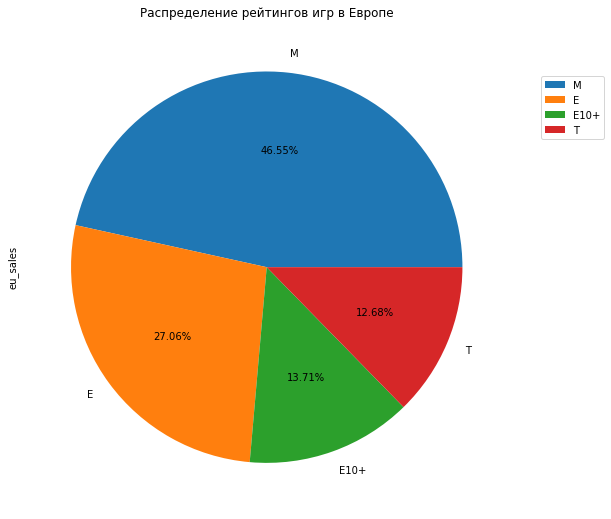

In [65]:
# <составим таблицу распределения рейтинга ESRB и построим круговую диаграмму с помощью библиотеки matplotlib>
(games[games['year_of_release']>2011]
     .pivot_table(index="rating", values="eu_sales", aggfunc="sum")
     .sort_values('eu_sales', ascending = False)
     .plot(y="eu_sales", kind="pie", figsize=(9,9), autopct='%1.2f%%')
)
plt.legend(bbox_to_anchor=(0.5, 0, 0.7, 0.9))
plt.title('Распределение рейтингов игр в Европе')

Суммарные продажи для каждого значения рейтинга:

In [66]:
# <отобразим таблицу суммарных продаж по ретингам>
(games[games['year_of_release']>2011]
     .pivot_table(index="rating", values="eu_sales", aggfunc="sum")
     .sort_values('eu_sales', ascending = False).head(5)
).reset_index()

,rating,eu_sales
0,M,194.44
1,E,113.03
2,E10+,57.25
3,T,52.96


Явно выделяются игры жанра *M*.

### Портрет пользователя  в Японии 

#### Самые популярные платформы в Японии

Для определения самых популярных (топ-5) платформ в Японии построим круговую диаграмму:

Text(0.5, 1.0, 'Самые популярные платформы в Японии')

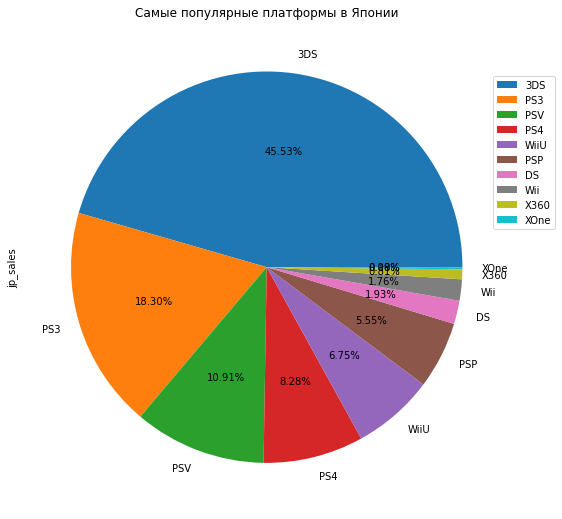

In [67]:
# <составим таблицу распределения суммарных продаж по платформам и построим круговую диаграмму с помощью библиотеки matplotlib>
(games[games['year_of_release']>2011]
     .pivot_table(index="platform", values="jp_sales", aggfunc="sum")
     .sort_values('jp_sales', ascending = False)
     .plot(y="jp_sales", kind="pie", figsize=(9,9), autopct='%1.2f%%')
)
plt.legend(bbox_to_anchor=(0.5, 0, 0.6, 0.9))
plt.title('Самые популярные платформы в Японии')

Выведем топ-5 платформ со значением суммарных продаж:

In [68]:
# <отобразим таблицу суммарных продаж по платформам>
(games[games['year_of_release']>2011]
     .pivot_table(index="platform", values="jp_sales", aggfunc="sum")
     .sort_values('jp_sales', ascending = False).head(5)
).reset_index()

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


Явно выделяется платформа *Nintendo*(3DS).

#### Самые популярные жанры в Японии 

Для определения самых популярных (топ-5) жанров в Японии построим круговую диаграмму:

Text(0.5, 1.0, 'Самые популярные жанры в Японии')

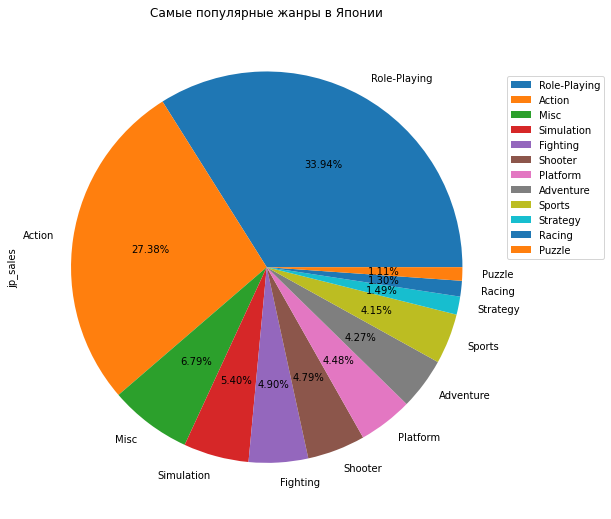

In [69]:
# <составим таблицу распределения суммарных продаж по жанрам и построим круговую диаграмму с помощью библиотеки matplotlib>
(games[games['year_of_release']>2011]
     .pivot_table(index="genre", values="jp_sales", aggfunc="sum")
     .sort_values('jp_sales', ascending = False)
     .plot(y="jp_sales", kind="pie", figsize=(9,9), autopct='%1.2f%%')
)
plt.legend(bbox_to_anchor=(0.5, 0, 0.7, 0.9))
plt.title('Самые популярные жанры в Японии')

Выведем топ-5 жанров со значением суммарных продаж:

In [70]:
# <отобразим таблицу суммарных продаж по жанрам>
(games[games['year_of_release']>2011]
     .pivot_table(index="genre", values="jp_sales", aggfunc="sum")
     .sort_values('jp_sales', ascending = False).head(5)
).reset_index()

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,13.10
3,Simulation,10.41
4,Fighting,9.44


Выделяются жанры *Role-Playing	* и *Action*.

#### Анализ влияения рейтинга ESRB на продажи Японии

Для оценки влияения рейтинга ESRB на продажи в Японии построим круговую диаграмму:

Text(0.5, 1.0, 'Распределение рейтингов игр в Японии')

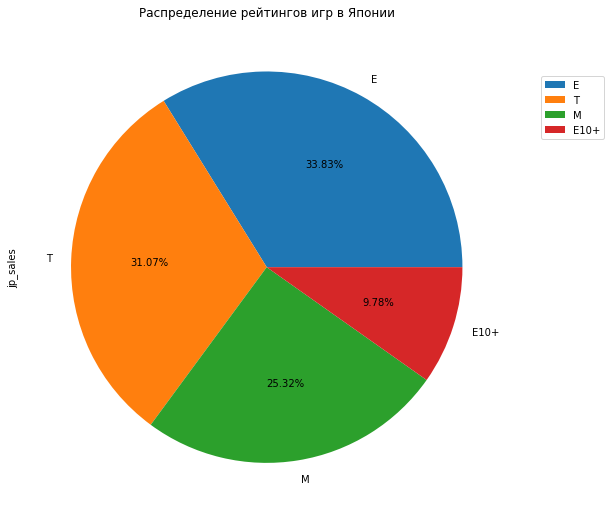

In [71]:
# <составим таблицу распределения рейтинга ESRB и построим круговую диаграмму с помощью библиотеки matplotlib>
(games[games['year_of_release']>2011]
     .pivot_table(index="rating", values="jp_sales", aggfunc="sum")
     .sort_values('jp_sales', ascending = False)
     .plot(y="jp_sales", kind="pie", figsize=(9,9), autopct='%1.2f%%')
)
plt.legend(bbox_to_anchor=(0.5, 0, 0.7, 0.9))
plt.title('Распределение рейтингов игр в Японии')

Суммарные продажи для каждого значения рейтинга:

In [72]:
# <отобразим таблицу суммарных продаж по ретингам>
(games[games['year_of_release']>2011]
     .pivot_table(index="rating", values="jp_sales", aggfunc="sum")
     .sort_values('jp_sales', ascending = False).head(5)
).reset_index()

,rating,jp_sales
0,E,28.33
1,T,26.02
2,M,21.20
3,E10+,8.19


Выделяются игры жанра *E*, *T* и *M*.

### Выводы

1. В топ-5 платформ во всех регионах входят последние версии платформы *PlayStation*(3 и 4) и *Xbox*(One и 360). Этот список разбавляет *Nintendo*(3DS). Также можно отметить что у пользователей JP эта плтформа лидирует с большим разрывом.
2. У пользователей NA и EU топовыми жанрами являются *Action*, *Shooter*, *Sports* и *Role-Playing*. У пользователей же JP самыми популярными жанрами являляются *Role-Playing* и *Action*. Такие расхождения обусловлены культурными особенностями японцев.
3. У пользователей NA и EU максимально повлияли на продажи игры с рейтингом *M*. У пользователей JP максимально повлияли на продажи игры с рейтингом *E* и *T*.

## Исследование статистических показателей

Рейтинг критиков и рейтинг пользователей имеют разые системы оценок. Рейтинг критиков оценивается по стобальной шкале, рейтинг пользователей - по десятибальной. Поэтому рассмотрим их отдельно:

### Посмотрим оценки критиков в разных жанрах:

Text(0, 0.5, 'Жанры')

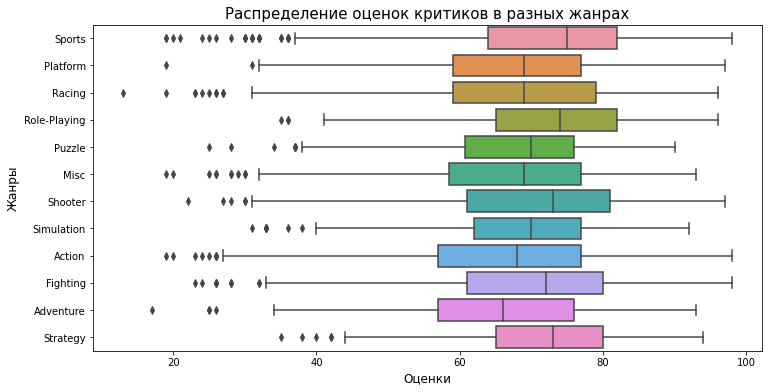

In [73]:
# <построим диаграмму размаха оценок критиков в разных жанрах с помощью с помощью библиотеки seaborn>
plt.figure(figsize=(12,6))
sns.boxplot(data=games, x='critic_score', y='genre')
plt.title('Распределение оценок критиков в разных жанрах', fontsize=15)
plt.xlabel('Оценки', fontsize=12)
plt.ylabel('Жанры',fontsize=12)

Для выявления высокооцененных жанров среди критиков, построим гистограму по средним значениям оценок:

In [74]:
# <создадим таблицу отображающую среднюю оценку критиков для каждой платформы и построим гистограмму с помощью пакета plotly>
genre_critic_score = games.groupby('genre')[['critic_score']].mean()

genre_critic_score.columns = ['critic_score']
genre_critic_score.sort_values('critic_score', ascending=False, inplace=True)

trace = go.Bar(
    x=genre_critic_score.index,
    y=genre_critic_score.critic_score,
    name='critic_score'
)
data = [trace]
layout = {'title': 'Средняя оценка критиков','xaxis': {'title': 'Жанр'}}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Самые высокооцененные жанры у критиков:

In [75]:
# <составим и отобразим таблицу: топ-5 платформ согласно рейтинга критиков с выводом средней оценки>
top5_critic_score = (games.pivot_table(
    index='genre', values='critic_score', aggfunc='mean')
    .sort_values(by='critic_score', ascending=False).head(5)
)
top5_critic_score = top5_critic_score.reset_index()
top5_critic_score

,genre,critic_score
0,Role-Playing,72.652646
1,Strategy,72.086093
2,Sports,71.968174
3,Shooter,70.181144
4,Fighting,69.217604


Посчитаем среднее, дисперсию и стандартное отклонение для этих жанров:

In [76]:
# <посчитаем дисперсию, стандартное отклонение, среднее и медиану у топ-5 жанров к оценкам критиков>
for i in list(top5_critic_score['genre']):
    print('Дисперсия', i,':', np.var(games[games['genre']==i]['critic_score']))
    print('Стандартное отклонение', i,':', np.std(games[games['genre']==i]['critic_score']))
    print('Среднее',i,':',  games[games['genre']==i]['critic_score'].mean())
    print('Медиана',i,':',  games[games['genre']==i]['critic_score'].median())
    print('\n')

Дисперсия Role-Playing : 143.80064768055612
Стандартное отклонение Role-Playing : 11.991690776556746
Среднее Role-Playing : 72.65264586160109
Медиана Role-Playing : 74.0


Дисперсия Strategy : 139.44954168676813
Стандартное отклонение Strategy : 11.808875547094573
Среднее Strategy : 72.08609271523179
Медиана Strategy : 73.0


Дисперсия Sports : 192.44957338338818
Стандартное отклонение Sports : 13.872619557365082
Среднее Sports : 71.96817420435511
Медиана Sports : 75.0


Дисперсия Shooter : 211.55299191144783
Стандартное отклонение Shooter : 14.544861357587697
Среднее Shooter : 70.18114406779661
Медиана Shooter : 73.0


Дисперсия Fighting : 203.42208619030257
Стандартное отклонение Fighting : 14.262611478628399
Среднее Fighting : 69.21760391198045
Медиана Fighting : 72.0




Построим гистограмму и диаграмму размаха, опишем распределение всех оценок критиков:

<AxesSubplot:>

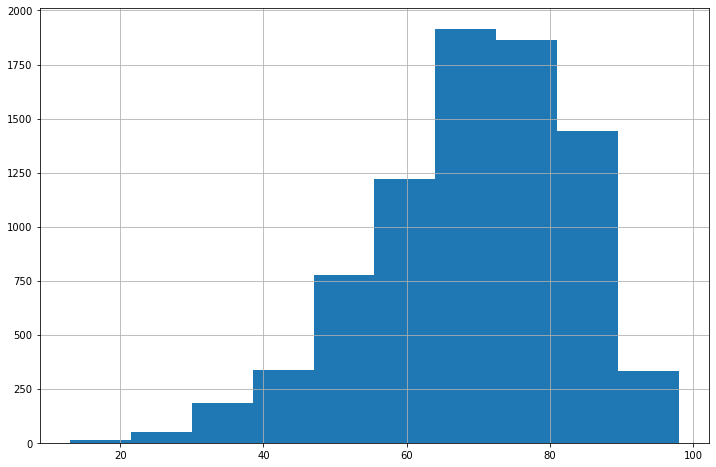

In [77]:
# <gостроим гистограмму распределения оценок критиков>
games['critic_score'].hist()

<AxesSubplot:>

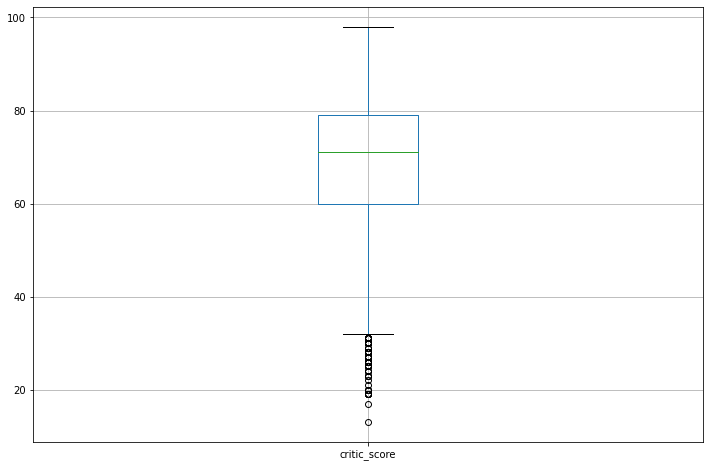

In [78]:
# <gостроим диаграмму размаха оценок критиков>
games.boxplot('critic_score') 

In [79]:
# <численно опишем оценки критиков с помощью функции describe()>
games['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Исходя из графиков, можно сказать, что распределение оценок критиков стремится к нормальному, есть  скошенность в отрицательную сторону.

### Посмотрим оценки пользователей в разных жанрах:

Text(0, 0.5, 'Жанры')

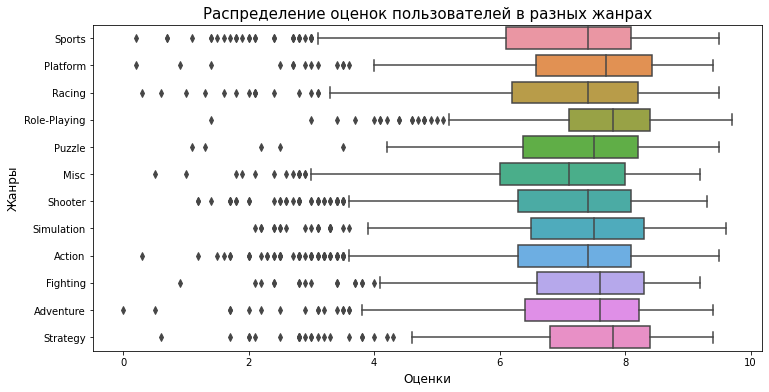

In [80]:
# <построим диаграмму размаха оценок пользователей в разных жанрах с помощью с помощью библиотеки seaborn>
plt.figure(figsize=(12,6))
sns.boxplot(data=games, x='user_score', y='genre')
plt.title('Распределение оценок пользователей в разных жанрах', fontsize=15)
plt.xlabel('Оценки', fontsize=12)
plt.ylabel('Жанры',fontsize=12)

Для выявления высокооцененных жанров среди пользователей, построим гистограму по средним значениям оценок:

In [81]:
# <создадим таблицу отображающую среднюю оценку пользователей для каждой платформы>
# <и построим гистограмму с помощью пакета plotly>
genre_user_score = games.groupby('genre')[['user_score']].mean()

genre_user_score.columns = ['user_score']
genre_user_score.sort_values('user_score', ascending=False, inplace=True)

trace = go.Bar(
    x=genre_user_score.index,
    y=genre_user_score.user_score,
    name='user_score'
)
data = [trace]
layout = {'title': 'Оценки пользователей','xaxis': {'title': 'Жанр'}}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Самые высокооцененные жанры у пользователей:

In [82]:
# <составим и отобразим таблицу: топ-5 платформ согласно рейтинга пользователей с выводом средней оценки>
top5_user_score = (games.pivot_table(
    index='genre', values='user_score', aggfunc='mean')
    .sort_values(by='user_score', ascending=False).head(5)
)
top5_user_score = top5_user_score.reset_index()
top5_user_score

,genre,user_score
0,Role-Playing,7.619515
1,Fighting,7.302506
2,Platform,7.301402
3,Strategy,7.295177
4,Puzzle,7.175000


Посчитаем среднее, дисперсию и стандартное отклонение для этих жанров:

In [83]:
# <посчитаем дисперсию, стандартное отклонение, среднее и медиану у топ-5 жанров к оценкам пользователей>
for i in list(top5_user_score['genre']):
    print('Дисперсия', i,':', np.var(games[games['genre']==i]['user_score']))
    print('Стандартное отклонение', i,':', np.std(games[games['genre']==i]['user_score']))
    print('Среднее',i,':',  games[games['genre']==i]['user_score'].mean())
    print('Медиана',i,':',  games[games['genre']==i]['user_score'].median())
    print('\n')

Дисперсия Role-Playing : 1.1836433722368822
Стандартное отклонение Role-Playing : 1.0879537546407394
Среднее Role-Playing : 7.619515477792736
Медиана Role-Playing : 7.8


Дисперсия Fighting : 1.9624999842965811
Стандартное отклонение Fighting : 1.4008925670073995
Среднее Fighting : 7.302506265664169
Медиана Fighting : 7.6


Дисперсия Platform : 2.2856989693423015
Стандартное отклонение Platform : 1.511852826614516
Среднее Platform : 7.3014018691588785
Медиана Platform : 7.7


Дисперсия Strategy : 2.662066769367557
Стандартное отклонение Strategy : 1.6315841288047506
Среднее Strategy : 7.295176848874596
Медиана Strategy : 7.8


Дисперсия Puzzle : 2.291562499999999
Стандартное отклонение Puzzle : 1.513790771540109
Среднее Puzzle : 7.174999999999998
Медиана Puzzle : 7.5




Построим гистограмму и диаграмму размаха, опишем распределение всех оценок пользователей:

<AxesSubplot:>

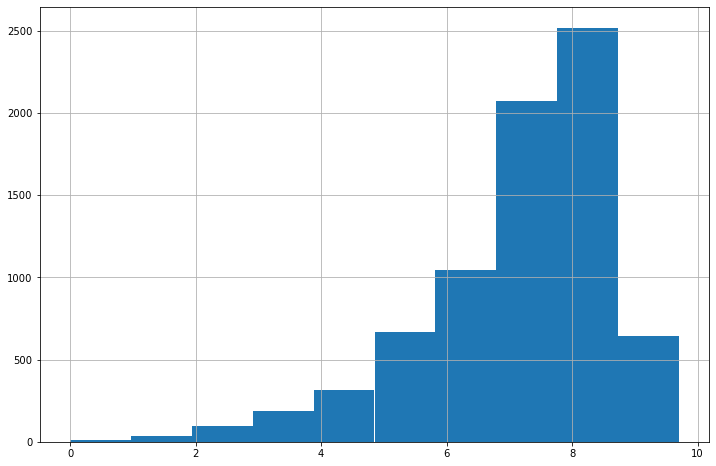

In [84]:
# <gостроим гистограмму распределения оценок пользователей>
games['user_score'].hist()

<AxesSubplot:>

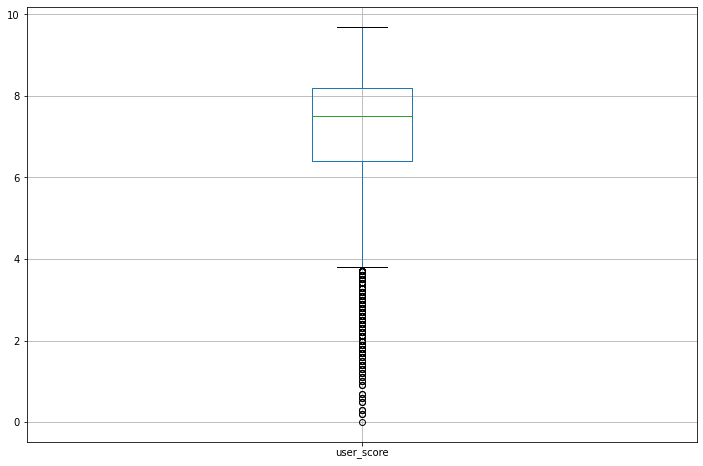

In [85]:
# <gостроим диаграмму размаха оценок пользователей>
games.boxplot('user_score')

In [86]:
# <численно опишем оценки критиков с помощью функции describe()>
games['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Исходя из графиков, можно сказать, что распределение оценок пользователей стремится к нормальному, есть скошенность в отрицательную сторону.

## Проверка гипотез

*Нулевая гипотеза* – это основное проверяемое предположение, которое обычно формулируется как отсутствие различий (различие между генеральными совокупностями равно нулю).  
*Альтернативная гипотеза* - предположение, принимаемое в случае отклонения нулевой гипотезы (H<sub>0</sub>). Как правило, альтернативная гипотеза (H<sub>1</sub>) — это единственное утверждение, являющееся логическим отрицанием нулевой гипотезы.

### Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую гипотезу H<sub>0</sub>: *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*.  
Сформулируем альтернативную гипотезу H<sub>1</sub>: *Средние пользовательские рейтинги платформ Xbox One и PC разные*.

Посчитаем среднюю оценку пользователей для этих платформ за последние 5 лет:

In [87]:
# <найдем средние оценки пользователей и объемы выборок>
plotform_hypothesis = ['XOne','PC']
for i in list(plotform_hypothesis):
    print('Среднее оценка пользователей игр на платформе',i,':',
        games[(games['platform']==i)&(games['year_of_release']>2011)]['user_score'].mean())
    print('Объем выборки',i,':',  games[games['platform']==i]['user_score'].count())

Среднее оценка пользователей игр на платформе XOne : 6.52142857142857
Объем выборки XOne : 182
Среднее оценка пользователей игр на платформе PC : 6.44549763033175
Объем выборки PC : 770


В исходном датасете пропущено более 7.5 тысяч значений столбца *user_score*.  
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим парный t-тест. 


При выборе критического уровня значимости необходимо обращать внимание на объем выборки. При увеличении объема выборки случайные отклонения компенсируют друг друга, и получить значимое различие в выборках при их однородности менее вероятно. Следовательно, надо брать меньший уровень значимости. При объеме выборки, измеряемой сотнями, следует выбрать уровень значимости равный 0,01.

Проверим гипотезу:

In [88]:
# <выполним проверку гипотезы с помощью метода ttest_ind>
alpha = 0.01

results = (st.ttest_ind(games[(games['platform']=='XOne')&(games['year_of_release']>2011)]['user_score'].dropna(), 
                        games[(games['platform']=='PC')&(games['year_of_release']>2011)]['user_score'].dropna()))
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.6252774522173157
Не получилось отвергнуть нулевую гипотезу


Значение вероятности pvalue равно примерно 63%. Следовательно, не удалось опровергнуть нулевую гипотезу. Это большая вероятность, чтобы делать вывод о значимом различии между среднепользовательскими рейтингами платформ *Xbox One* и *PC*.

### Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую гипотезу H<sub>0</sub>: *Средние пользовательские рейтинги жанров Action и Sports одинаковы*.  
Сформулируем альтернативную гипотезу H<sub>1</sub>: *Средние пользовательские рейтинги жанров Action и Sports разные*.

Посчитаем среднюю оценку пользователей для этих жанров за последние 5 лет:

In [89]:
# <найдем средние оценки пользователей и объемы выборок>
genre_hypothesis = ['Action','Sports']
for i in list(genre_hypothesis):
    print('Среднее оценка пользователей игр жанра',i,':',
          (games[(games['genre']==i)&(games['year_of_release']>2011)]['user_score'].mean()))
    print('Объем выборки',i,':',  games[games['genre']==i]['user_score'].count())

Среднее оценка пользователей игр жанра Action : 6.83427495291903
Объем выборки Action : 1830
Среднее оценка пользователей игр жанра Sports : 5.455897435897437
Объем выборки Sports : 1103


В исходном датасете пропущено более 7.5 тысяч значений столбца *user_score*.  
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим парный t-тест. 

При выборе критического уровня значимости необходимо обращать внимание на объем выборки. При увеличении объема выборки случайные отклонения компенсируют друг друга, и получить значимое различие в выборках при их однородности менее вероятно. Следовательно, надо брать меньший уровень значимости. При объеме выборки, измеряемой сотнями, следует выбрать уровень значимости равный 0,01.

Проверим гипотезу:

In [90]:
# <выполним проверку гипотезы с помощью метода ttest_ind>
alpha = 0.01

results = (st.ttest_ind(games[(games['genre']=='Action')&(games['year_of_release']>2011)]['user_score'].dropna(), 
                        games[(games['genre']=='Sports')&(games['year_of_release']>2011)]['user_score'].dropna()))
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.1405639632267916e-26
Отвергаем нулевую гипотезу


Значение вероятности pvalue очень мало. Следовательно, опровергаем нулевую гипотезу. Эта вероятность, говорит о значительном различии между среднепользовательскими рейтингами жанров *Action* и *Sports*.

## Вывод

1. На этапе первичного изучения данных отметили ряд неточностей и слабых мест в исходном датасете.
2. Была произведена предоброботка данных и устранены все несоответствия. Также были посчитаны и добавлены в датасет суммарные продажи по всем регионам.
3. Стремительное развитие платформ началось с 2001 года. Максимальное количество игр выходило в 2008 и 2009 годах. 
4. Самые прибыльные платформы за актуальный период это *PS2*, *X360*, *PS3*, *Wii* и *3DS*.
5. Характерный период за который появляются новые и исчезают старые платформы составляет примерно 10 лет. Также можно отметить, что пик суммарных продаж платформ приходится на середину периода существования - 5 лет.
6. Платформы PS4 и XOne можно выбрать как потенциально прибыльные т.к., согласно статистике, в ближайшее время у игр на них будут максимально высокие суммарные продажи.
7. Игры для платформ X360 и PS4 имеют наибольшие средние продажи.
8. Оценки критиков слабо связаны с суммарными продажами. Оценки пользователей очень слабо связаны с суммарными продажами.
9. В топ-5 платформ во всех регионах входят: *PS4*, *PS3*, *X360*, *XOne* и *3DS*.  
    В топ-5 жанров во всех регионах входят: *Action*, *Shooter*, *Sports*, *Role-Playing* и *Misc*.  
    А рейтинг ESRB достаточно сильно влияет на продажи в регионах.
    Также можно отметить отличие пользователей из Японии от всех остальных. Это надо учитывать при планировании компании.
10. Самые высокооцененные жанры среди критиков: *Role-Playing*, *Strategy* и *Sports*. Самые высокооцененные жанры среди пользователей: *Role-Playing*, *Fighting* и *Platform*.
11. Проверили гипотезы и подтвердили, что обе гипотезы мы не отвергаем (данные не противоречат им).
12. Прогнозируя компанию на 2017 год, нужно делать упор на жанр *Action*, платформу *PS4* и рейтинг *M*.